In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [51]:
%cd C:\Users\91907\Downloads\Python Foundation Case Study 1 - Retail Case Study

C:\Users\91907\Downloads\Python Foundation Case Study 1 - Retail Case Study


In [52]:
cust=pd.read_csv('Customer.csv')
trans=pd.read_csv('Transactions.csv')
prod_h=pd.read_csv('prod_cat_info.csv')
cust.head(1)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0


# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [53]:
customer2= pd.merge(left=trans,right=prod_h, how ='left',left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'])
customer2.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,1,Women


In [54]:
customer_final =pd.merge(left=customer2,right=cust,how="left",left_on=["cust_id"],right_on=["customer_Id"])
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,22-05-1970,M,2.0


# 2. Prepare a summary report for the merged data set.


# a. Get the column names and their corresponding data types

In [55]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   cust_id            23053 non-null  int64  
 2   tran_date          23053 non-null  object 
 3   prod_subcat_code   23053 non-null  int64  
 4   prod_cat_code      23053 non-null  int64  
 5   Qty                23053 non-null  int64  
 6   Rate               23053 non-null  int64  
 7   Tax                23053 non-null  float64
 8   total_amt          23053 non-null  float64
 9   Store_type         23053 non-null  object 
 10  prod_cat           23053 non-null  object 
 11  prod_sub_cat_code  23053 non-null  int64  
 12  prod_subcat        23053 non-null  object 
 13  customer_Id        23053 non-null  int64  
 14  DOB                23053 non-null  object 
 15  Gender             23044 non-null  object 
 16  city_code          230

# b. Top/Bottom 10 observations

In [56]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances,269014,27-11-1979,F,3.0


In [57]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,10,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,4,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,6,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,11,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,4,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,11,Children,271961,15-01-1982,M,1.0


# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [58]:
customer_final.iloc[:,6:9].describe().iloc[3:8]

,Rate,Tax,total_amt
min,-1499.0,7.350,-8270.925
25%,312.0,98.280,762.450
50%,710.0,199.080,1754.740
75%,1109.0,365.715,3569.150
max,1500.0,787.500,8287.500


# d. Frequency tables for all the categorical variables

In [59]:
customer_final.loc[:,customer_final.dtypes=="object"].describe().iloc[-1,:]

tran_date         35
Store_type      9311
prod_cat        6069
prod_subcat     3048
DOB               32
Gender         11811
Name: freq, dtype: object

# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [60]:
hist = customer_final.loc[:, (customer_final.dtypes=='int64') | (customer_final.dtypes=='float64')]
hist.columns

Index(['transaction_id', 'cust_id', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'prod_sub_cat_code', 'customer_Id',
       'city_code'],
      dtype='object')

<AxesSubplot:>

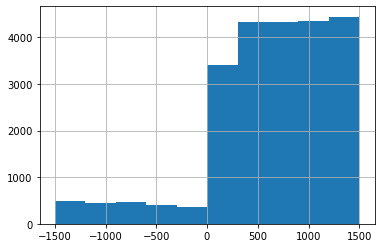

In [61]:
hist.Rate.hist()

<AxesSubplot:>

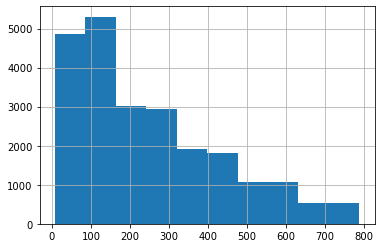

In [62]:
hist.Tax.hist()

<AxesSubplot:>

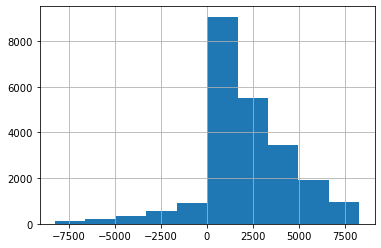

In [63]:
hist.total_amt.hist()

In [64]:
cat = customer_final.loc[:, (customer_final.dtypes=='object')]
cat.columns

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

<AxesSubplot:>

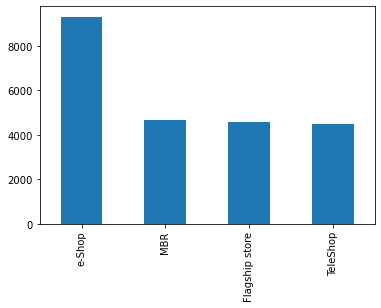

In [65]:
cat.Store_type.value_counts().plot.bar()

<AxesSubplot:>

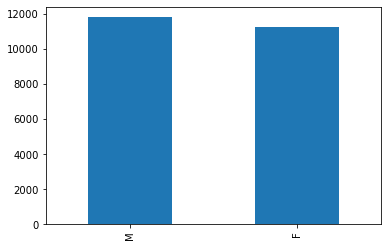

In [66]:
cat.Gender.value_counts().plot.bar()

<AxesSubplot:>

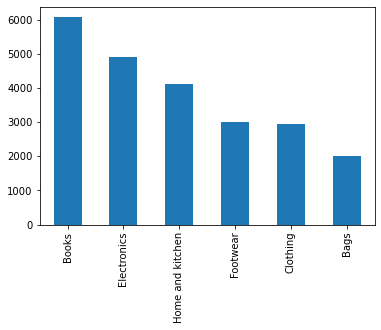

In [67]:
cat.prod_cat.value_counts().plot.bar()

<AxesSubplot:>

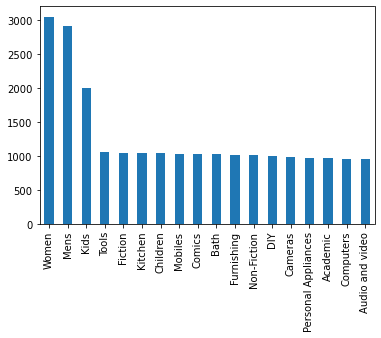

In [68]:
cat.prod_subcat.value_counts().plot.bar()

# 4. Calculate the following information using the merged dataset :

# a. Time period of the available transaction data

In [69]:
customer_final.tran_date=customer_final.tran_date.astype('datetime64')
print(customer_final.tran_date.max()-customer_final.tran_date.min())

1430 days 00:00:00


# b. Count of transactions where the total amount of transaction was negative

In [70]:
negative_trans = len(customer_final[customer_final.total_amt<0].total_amt)
negative_trans

2177

# 5. Analyze which product categories are more popular among females vs male customers.

In [71]:
pd.pivot_table(data=customer_final,index='prod_cat',values='Qty',columns='Gender',aggfunc=len).sort_values(by=['F','M'],ascending=False).head(5)

Gender,F,M
prod_cat,,
Books,2949,3116
Electronics,2328,2570
Home and kitchen,1994,2134
Footwear,1529,1469
Clothing,1439,1518


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?
                                                 

In [72]:
x=pd.pivot_table(data=customer_final,index='city_code',values='customer_Id',aggfunc=len).sort_values(by='customer_Id',ascending=False)
x.head(1)

,customer_Id
city_code,
4.0,2422


In [73]:
percentage=(x.max()/x.sum())*100
percentage

customer_Id    10.509872
dtype: float64

# 7. Which store type sells the maximum products by value and by quantity?

In [74]:
customer_final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False).head(1)

C:\Users\91907\AppData\Local\Temp/ipykernel_9860/2362288393.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False).head(1)


,Qty,Rate
Store_type,,
e-Shop,22763,5941001


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [28]:
f_stores=pd.pivot_table(data=customer_final,index='prod_cat',columns='Store_type',values='total_amt',aggfunc='sum')

f_stores.loc[['Clothing','Electronics'],'Flagship store'].sum()

3409559.27

# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [29]:
elect=customer_final[customer_final.prod_cat=='Electronics']
maleelec=elect[elect.Gender=='M']
maleelec.total_amt.sum()

5703109.424999999

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [30]:
cust=customer_final[customer_final.total_amt>0]
x=pd.pivot_table(data=cust,index='customer_Id',values='transaction_id',aggfunc=len)
x[x.transaction_id>10].count()

transaction_id    6
dtype: int64

# 11. For all customers aged between 25 - 35, find out:
 

# a. What was the total amount spent for “Electronics” and “Books” product categories?
 

In [31]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23053 non-null  int64         
 1   cust_id            23053 non-null  int64         
 2   tran_date          23053 non-null  datetime64[ns]
 3   prod_subcat_code   23053 non-null  int64         
 4   prod_cat_code      23053 non-null  int64         
 5   Qty                23053 non-null  int64         
 6   Rate               23053 non-null  int64         
 7   Tax                23053 non-null  float64       
 8   total_amt          23053 non-null  float64       
 9   Store_type         23053 non-null  object        
 10  prod_cat           23053 non-null  object        
 11  prod_sub_cat_code  23053 non-null  int64         
 12  prod_subcat        23053 non-null  object        
 13  customer_Id        23053 non-null  int64         
 14  DOB   

In [32]:
customer_final.DOB=customer_final.DOB.astype('datetime64')

In [33]:
import datetime
from datetime import datetime as dt
customer_final['age']=(customer_final.tran_date.dt.year)-(customer_final.DOB.dt.year)
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,1981-09-26,M,5.0,33
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,1973-11-05,F,8.0,41
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,22
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,271509,1981-08-06,M,3.0,33
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,273420,1992-07-27,M,8.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,274550,1972-02-21,M,7.0,39
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,270022,1984-04-27,M,9.0,27
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,271020,1976-06-20,M,8.0,35
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,270911,1970-05-22,M,2.0,41


In [34]:
cust3=customer_final[(customer_final.age >25) & (customer_final.age <35) ]
cust3[(cust3.prod_cat=='Electronics') | (cust3.prod_cat=='Books')].total_amt.sum()

9148053.004999999

# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [35]:
cust3[(cust3.tran_date>='2014-01-01') & (cust3.tran_date<='2014-03-01') ].total_amt.sum()

521411.92999999993